In [2]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras import datasets

In [4]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
np.ndim(X_train)

4

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
y_train[0]

array([6], dtype=uint8)

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_train = y_train.flatten()
y_train.shape

(50000,)

In [12]:
X_train.shape

(50000, 32, 32, 3)

In [13]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

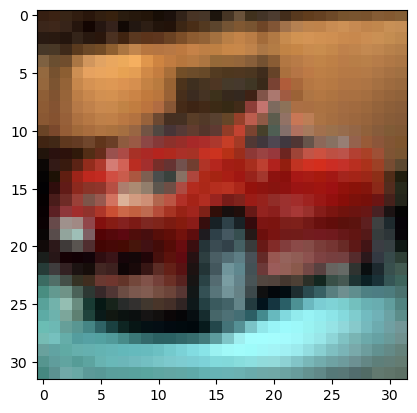

In [14]:
plt.imshow(X_train[45])
plt.show()

In [15]:
y_train[45]

1

In [16]:
categories = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [17]:
categories[1]

'automobile'

In [18]:
def plot_image(X,y,index):
    plt.imshow(X[index])
    plt.xlabel(categories[y[index]])
    plt.show

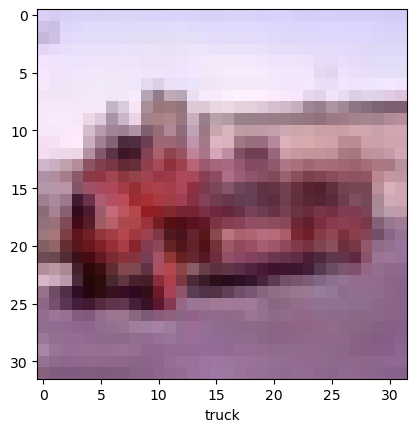

In [19]:
plot_image(X_train,y_train,67)

In [20]:
y_test = y_test.flatten()

In [21]:
X_train.shape

(50000, 32, 32, 3)

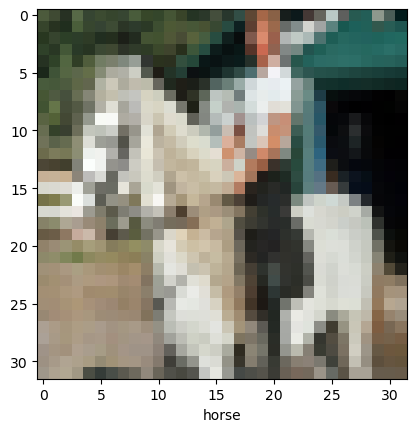

In [22]:
plot_image(X_test,y_test,56)

In [23]:
X_train = X_train/255
X_test = X_test/255

In [25]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation = 'relu'),
    keras.layers.Dense(1000,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

In [27]:
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['Accuracy'])

In [28]:
ann.fit(X_train,y_train,epochs=2)

Epoch 1/2


1563/1563 [==============================] - 297s 187ms/step - loss: 1.8882 - Accuracy: 0.3203
Epoch 2/2
1563/1563 [==============================] - 293s 187ms/step - loss: 1.6751 - Accuracy: 0.3971


In [30]:
cnn = keras.Sequential([
    keras.layers.Conv2D(input_shape = (32,32,3),filters=32,kernel_size=3,activation='relu',padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(3000, activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

In [31]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['Accuracy'])

In [32]:
cnn.fit(X_train,y_train,epochs=2)

Epoch 1/2
1563/1563 [==============================] - 910s 578ms/step - loss: 1.3679 - Accuracy: 0.5109
Epoch 2/2
1563/1563 [==============================] - 897s 574ms/step - loss: 0.9433 - Accuracy: 0.6695
